In [14]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
import sys
import os

sys.path.insert(0, '../dual_task')
current_dir = os.path.dirname(os.path.abspath('__file__'))
# Get parent directory (= the project root)
project_root = os.path.join(current_dir, '..')
# Append to system path
sys.path.append(project_root)


In [16]:
from importlib import reload
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import sem
from scipy.io import loadmat
# from pingouin import rm_anova, anova
import pandas as pd

import src.common
from src.common.plot_utils import add_vlines, save_fig
from src.common.write import replace_global
from src.stats.bootstrap import my_boots_ci

sns.set_context("paper")
sns.set_style("ticks")
plt.rc("axes.spines", top=False, right=False)


In [17]:
sns.set_context("poster")
sns.set_style("ticks")
plt.rc("axes.spines", top=False, right=False)
fig_path = '../figs/perf'
golden_ratio = (5**.5 - 1) / 2
width = 6

matplotlib.rcParams['figure.figsize'] = [width, width * golden_ratio ]
# matplotlib.rcParams['lines.markersize'] = 3
%matplotlib inline


# Cross temporal decoding
All the decoding modules are in src.decode
Here are a few examples on how to run them.
Each routine can be passed parameters as key=value that is then read into a dictionnary.
All the parameters that can be passed are found in src.common/options

## Temporal decoding
We use mne_scores.py
features can be: sample, distractor, choice, decision
day can be: int, first, middle, last
task can be: DPA, DualGo, DualNoGo, all, Dual

0
loading files from /home/leon/dual_task/src./data/JawsM15


##########################################
PREPROCESSING: SCALER None AVG MEAN False AVG NOISE True UNIT VAR True
##########################################
MODEL: SCALER None IMBALANCE False PRESCREEN False PCA False METHOD None FOLDS stratified CLF log_loss
##########################################
DATA: FEATURES sample TASK DPA TRIALS correct DAYS first LASER 0
##########################################
multiple days
X_S1 (35, 693, 84) X_S2 (35, 693, 84)
n_max 35
X (70, 693, 84) y (70,)


--- 0:00:19.141439 ---


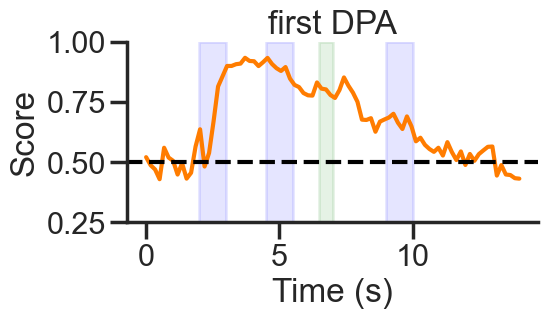

<Figure size 600x370.82 with 0 Axes>

In [18]:
run ../src.decode/mne_scores.py features=sample day=first task=DPA

0
loading files from /home/leon/dual_task/src./data/JawsM15


##########################################
PREPROCESSING: SCALER None AVG MEAN False AVG NOISE True UNIT VAR True
##########################################
MODEL: SCALER None IMBALANCE False PRESCREEN False PCA False METHOD None FOLDS stratified CLF log_loss
##########################################
DATA: FEATURES choice TASK DPA TRIALS correct DAYS first LASER 0
##########################################
multiple days
X_S1 (52, 693, 84) X_S2 (44, 693, 84)
n_max 44
X (88, 693, 84) y (88,)


--- 0:00:20.371654 ---


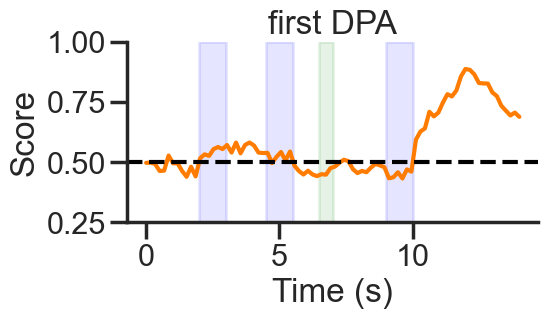

<Figure size 600x370.82 with 0 Axes>

In [28]:
run ../src.decode/mne_scores.py features=choice day=first task=DPA bootstrap=0 

0
loading files from /home/leon/dual_task/src./data/JawsM15


##########################################
PREPROCESSING: SCALER None AVG MEAN False AVG NOISE True UNIT VAR True
##########################################
MODEL: SCALER None IMBALANCE False PRESCREEN False PCA False METHOD None FOLDS stratified CLF log_loss
##########################################
DATA: FEATURES choice TASK DPA TRIALS correct DAYS first LASER 1
##########################################
multiple days
X_S1 (104, 693, 84) X_S2 (88, 693, 84)
n_max 88
X (176, 693, 84) y (176,)


--- 0:00:31.665616 ---


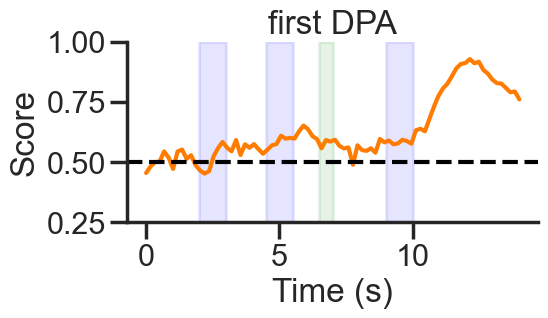

<Figure size 600x370.82 with 0 Axes>

In [25]:
run ../src.decode/mne_scores.py features=choice day=first task=DPA bootstrap=0 laser=1

0
loading files from /home/leon/dual_task/src./data/JawsM15


##########################################
PREPROCESSING: SCALER None AVG MEAN False AVG NOISE True UNIT VAR True
##########################################
MODEL: SCALER None IMBALANCE False PRESCREEN False PCA False METHOD None FOLDS stratified CLF log_loss
##########################################
DATA: FEATURES choice TASK DPA TRIALS correct DAYS last LASER 0
##########################################
multiple days
X_S1 (41, 693, 84) X_S2 (55, 693, 84)
n_max 41
X (82, 693, 84) y (82,)


--- 0:00:17.938128 ---


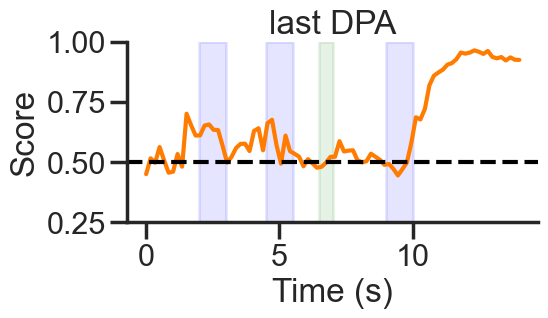

<Figure size 600x370.82 with 0 Axes>

In [26]:
run ../src.decode/mne_scores.py features=choice day=last task=DPA bootstrap=0 


0
loading files from /home/leon/dual_task/src./data/JawsM15


##########################################
PREPROCESSING: SCALER None AVG MEAN False AVG NOISE True UNIT VAR True
##########################################
MODEL: SCALER None IMBALANCE False PRESCREEN False PCA False METHOD None FOLDS stratified CLF log_loss
##########################################
DATA: FEATURES choice TASK DPA TRIALS correct DAYS last LASER 1
##########################################
multiple days
X_S1 (85, 693, 84) X_S2 (107, 693, 84)
n_max 85
X (170, 693, 84) y (170,)


--- 0:00:31.187065 ---


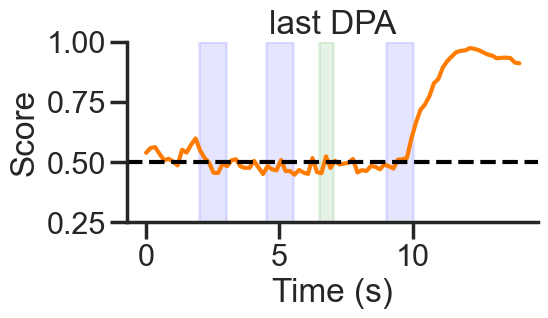

<Figure size 600x370.82 with 0 Axes>

In [27]:
run ../src.decode/mne_scores.py features=choice day=last task=DPA bootstrap=0 laser=1


loading files from /home/leon/dual_task/src./data/JawsM15


##########################################
PREPROCESSING: SCALER None AVG MEAN False AVG NOISE True UNIT VAR True
##########################################
MODEL: SCALER None IMBALANCE False PRESCREEN False PCA False METHOD None FOLDS stratified CLF log_loss
##########################################
DATA: FEATURES choice TASK Dual TRIALS correct DAYS first LASER 0
##########################################
multiple days
X_S1 (95, 693, 84) X_S2 (97, 693, 84)
n_max 95
X (190, 693, 84) y (190,)


--- 0:00:37.159629 ---


bootstrap:   0% 0/8400 [00:00<?, ?it/s]

bootstrap:   0% 1/8400 [02:52<403:36:16, 172.99s/it]

bootstrap:   0% 3/8400 [02:55<106:33:27, 45.68s/it] 

bootstrap:   0% 4/8400 [02:55<70:16:38, 30.13s/it] 

bootstrap:   0% 6/8400 [02:57<36:07:16, 15.49s/it]

bootstrap:   0% 8/8400 [02:57<21:14:09,  9.11s/it]

bootstrap:   0% 9/8400 [02:58<16:58:57,  7.29s/it]

bootstrap:   0% 11/8400 [02:58<10:19:36,  4.43s/it]

bootstrap:   0% 13/8400 [02:59<6:51:34,  2.94s/it] 

bootstrap:   0% 15/8400 [02:59<4:37:34,  1.99s/it]

bootstrap:   0% 16/8400 [02:59<3:46:43,  1.62s/it]

bootstrap:   0% 19/8400 [03:00<2:07:21,  1.10it/s]

bootstrap:   0% 21/8400 [03:00<1:36:10,  1.45it/s]

bootstrap:   0% 23/8400 [03:00<1:16:44,  1.82it/s]

bootstrap:   0% 25/8400 [03:00<56:04,  2.49it/s]  

bootstrap:   0% 27/8400 [03:01<50:54,  2.74it/s]

bootstrap:   0% 29/8400 [03:02<51:18,  2.72it/s]

bootstrap:   0% 30/8400 [03:02<44:42,  3.12it/s]

bootstrap:   0% 31/8400 [03:02<38:31,  3.62it/s]

bootstrap:   0% 33/8400 [03:02<27:21,  5.10it/s]

bootstrap:   0% 35/8400 [03:03<28:19,  4.92it/s]

bootstrap:   0% 39/8400 [03:03<16:18,  8.54it/s]

bootstrap:   0% 42/8400 [03:03<13:45, 10.13it/s]

bootstrap:   1% 45/8400 [03:03<11:38, 11.96it/s]

bootstrap:   1% 49/8400 [03:03<09:24, 14.79it/s]

bootstrap:   1% 51/8400 [03:03<10:04, 13.82it/s]

bootstrap:   1% 55/8400 [03:04<08:26, 16.49it/s]

bootstrap:   1% 57/8400 [03:04<14:28,  9.61it/s]

bootstrap:   1% 61/8400 [03:04<10:28, 13.27it/s]

bootstrap:   1% 64/8400 [03:04<11:33, 12.02it/s]

bootstrap:   1% 67/8400 [03:05<10:45, 12.92it/s]

bootstrap:   1% 70/8400 [03:05<09:18, 14.91it/s]

bootstrap:   1% 73/8400 [03:05<08:17, 16.73it/s]

bootstrap:   1% 76/8400 [03:05<12:26, 11.15it/s]

bootstrap:   1% 78/8400 [03:06<13:19, 10.41it/s]

bootstrap:   1% 80/8400 [03:06<12:12, 11.36it/s]

bootstrap:   1% 82/8400 [03:06<17:28,  7.93it/s]

bootstrap:   1% 84/8400 [03:06<17:10,  8.07it/s]

bootstrap:   1% 86/8400 [03:07<18:02,  7.68it/s]

bootstrap:   1% 89/8400 [03:07<21:24,  6.47it/s]

bootstrap:   1% 90/8400 [03:07<20:47,  6.66it/s]

bootstrap:   1% 92/8400 [03:08<18:08,  7.63it/s]

bootstrap:   1% 93/8400 [03:08<18:55,  7.32it/s]

bootstrap:   1% 95/8400 [03:08<25:51,  5.35it/s]

bootstrap:   1% 96/8400 [03:08<23:54,  5.79it/s]

bootstrap:   1% 97/8400 [03:10<1:18:35,  1.76it/s]

bootstrap:   1% 98/8400 [03:11<1:08:25,  2.02it/s]

bootstrap:   1% 99/8400 [03:11<1:03:33,  2.18it/s]

bootstrap:   1% 100/8400 [03:11<53:37,  2.58it/s] 

bootstrap:   1% 100/8400 [03:11<4:25:19,  1.92s/it]

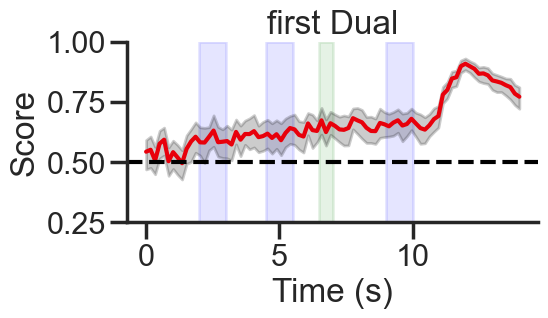

<Figure size 600x370.82 with 0 Axes>

In [11]:
run ../src.decode/mne_scores.py features=choice day=first task=Dual bootstrap=0


0
loading files from /home/leon/dual_task/src./data/JawsM15


##########################################
PREPROCESSING: SCALER None AVG MEAN False AVG NOISE True UNIT VAR True
##########################################
MODEL: SCALER None IMBALANCE False PRESCREEN False PCA False METHOD None FOLDS stratified CLF log_loss
##########################################
DATA: FEATURES choice TASK Dual TRIALS correct DAYS first LASER 1
##########################################
multiple days
X_S1 (183, 693, 84) X_S2 (201, 693, 84)
n_max 183
X (366, 693, 84) y (366,)


--- 0:01:17.652897 ---


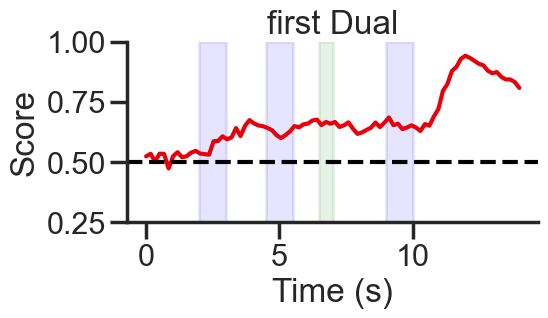

<Figure size 600x370.82 with 0 Axes>

In [29]:
run ../src.decode/mne_scores.py features=choice day=first task=Dual bootstrap=0 laser=1


0
loading files from /home/leon/dual_task/src./data/JawsM15


##########################################
PREPROCESSING: SCALER None AVG MEAN False AVG NOISE True UNIT VAR True
##########################################
MODEL: SCALER None IMBALANCE False PRESCREEN False PCA False METHOD None FOLDS stratified CLF log_loss
##########################################
DATA: FEATURES choice TASK Dual TRIALS correct DAYS Last LASER 0
##########################################
multiple days
X_S1 (171, 693, 84) X_S2 (213, 693, 84)
n_max 171
X (342, 693, 84) y (342,)


--- 0:01:05.816069 ---


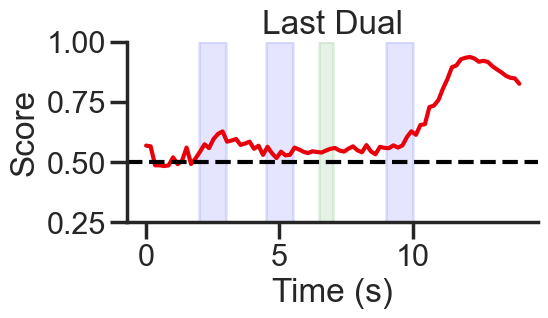

<Figure size 600x370.82 with 0 Axes>

In [23]:
run ../src.decode/mne_scores.py features=choice day=Last task=Dual bootstrap=0


0
loading files from /home/leon/dual_task/src./data/JawsM15


##########################################
PREPROCESSING: SCALER None AVG MEAN False AVG NOISE True UNIT VAR True
##########################################
MODEL: SCALER None IMBALANCE False PRESCREEN False PCA False METHOD None FOLDS stratified CLF log_loss
##########################################
DATA: FEATURES choice TASK Dual TRIALS correct DAYS Last LASER 1
##########################################
multiple days
X_S1 (331, 693, 84) X_S2 (437, 693, 84)
n_max 331


X (662, 693, 84) y (662,)


--- 0:03:41.973585 ---


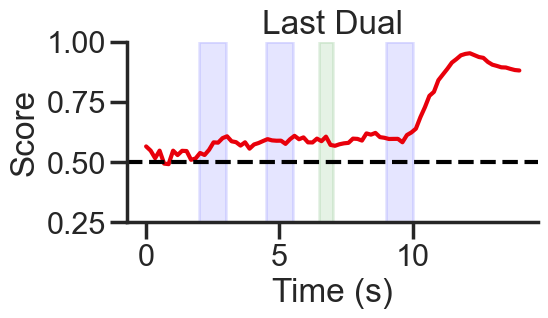

<Figure size 600x370.82 with 0 Axes>

In [20]:
run ../src.decode/mne_scores.py features=choice day=Last task=Dual bootstrap=0 laser=1


(1152, 693, 84)

## Cross temporal decoding
mne_cross_temp.py

(X_train, y_train, **fit_params)
  File "/home/leon/mambaforge/envs/src.lib/python3.8/site-packages/mne/decoding/search_light.py", line 85, in fit
    estimators = parallel(
  File "/home/leon/mambaforge/envs/src.lib/python3.8/site-packages/joblib/parallel.py", line 1855, in __call__
    return output if self.return_generator else list(output)
  File "/home/leon/mambaforge/envs/src.lib/python3.8/site-packages/joblib/parallel.py", line 1784, in _get_sequential_output
    res = func(*args, **kwargs)
  File "/home/leon/mambaforge/envs/src.lib/python3.8/site-packages/mne/decoding/search_light.py", line 332, in _sl_fit
    est.fit(X[..., ii], y, **fit_params)
  File "/home/leon/mambaforge/envs/src.lib/python3.8/site-packages/imblearn/pipeline.py", line 297, in fit
    self._final_estimator.fit(Xt, yt, **fit_params_last_step)
  File "/home/leon/mambaforge/envs/src.lib/python3.8/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/ho

ges/joblib/parallel.py", line 1855, in __call__
    return output if self.return_generator else list(output)
  File "/home/leon/mambaforge/envs/src.lib/python3.8/site-packages/joblib/parallel.py", line 1784, in _get_sequential_output
    res = func(*args, **kwargs)
  File "/home/leon/mambaforge/envs/src.lib/python3.8/site-packages/mne/decoding/search_light.py", line 332, in _sl_fit
    est.fit(X[..., ii], y, **fit_params)
  File "/home/leon/mambaforge/envs/src.lib/python3.8/site-packages/imblearn/pipeline.py", line 297, in fit
    self._final_estimator.fit(Xt, yt, **fit_params_last_step)
  File "/home/leon/mambaforge/envs/src.lib/python3.8/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/home/leon/mambaforge/envs/src.lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1878, in fit
    fold_coefs_ = Parallel(n_jobs=self.n_jobs, verbose=self.verbose, prefer=prefer)(
  File "/home/leon/mambaforge/envs/src.lib

--- 0:01:15.436385 ---


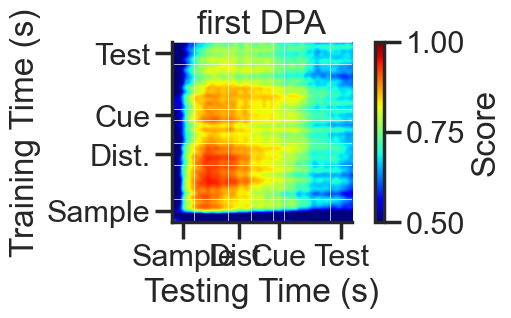

<Figure size 600x370.82 with 0 Axes>

loading files from /home/leon/dual_task/src./data/JawsM15


##########################################
PREPROCESSING: SCALER None AVG MEAN False AVG NOISE True UNIT VAR True
##########################################
MODEL: SCALER None IMBALANCE False PRESCREEN False PCA False METHOD None FOLDS stratified CLF log_loss
##########################################
DATA: FEATURES sample TASK DPA TRIALS correct DAYS first LASER 0
##########################################
multiple days
X_S1 (35, 693, 84) X_S2 (35, 693, 84)
X (70, 693, 84) y (70,)
##########################################
DATA: FEATURES sample TASK DPA TRIALS correct DAYS first LASER 0
##########################################
multiple days
X_S1 (35, 693, 84) X_S2 (35, 693, 84)


--- 0:01:07.571412 ---


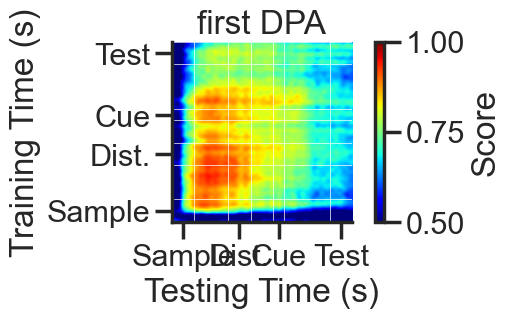

<Figure size 600x370.82 with 0 Axes>

In [24]:
run ../src.decode/mne_cross_temp.py features=sample day=first task=DPA